first we plot noisy and fourier transform of noisy. Then we implement a lowpass filter with np.sin() function and adjust it to correctly filters the noisy signal. We know that the dominant frequencies are not noisy, hence we need to filter low frequencies and pass high frequencies. Then we convolve the lowpass filter with noisy signal to pass high frequencies.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [63]:
def plot(xlabel: str, ylabel: str, title: str, x, y):
    plt.figure(figsize=(30, 10))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

first we plot noisy and fourier transform of noisy.

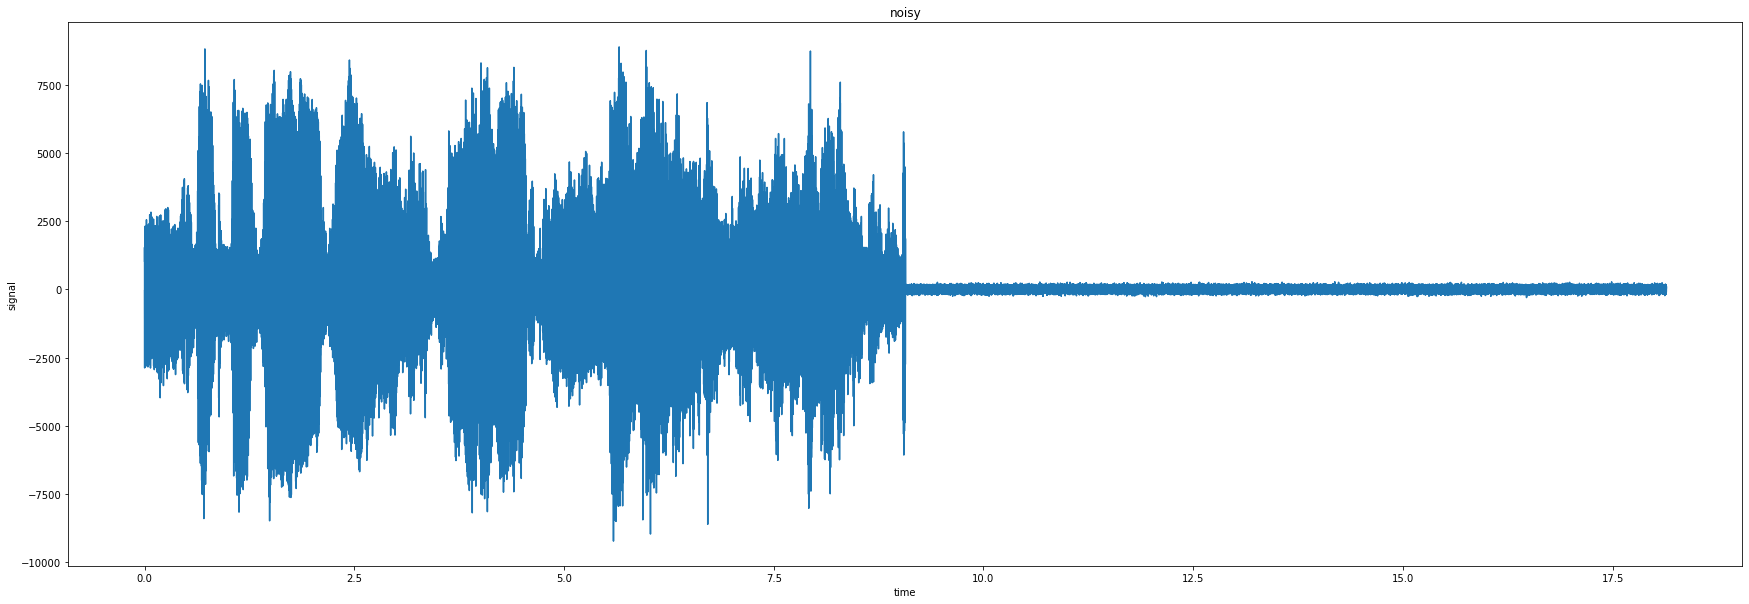

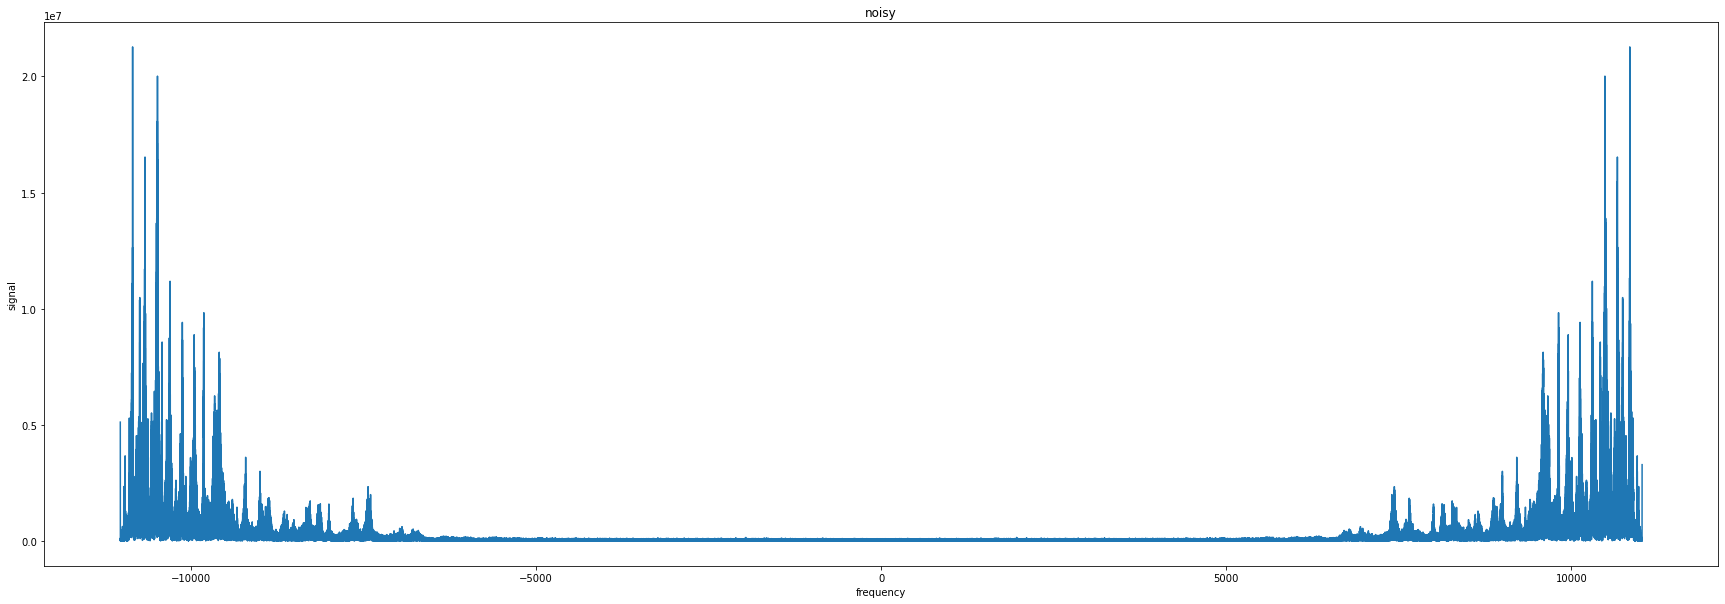

In [64]:
# signal noisy
rate_noisy, noisy = wavfile.read('./noisy1.wav')
length_noisy = noisy.shape[0]/rate_noisy
t_noisy = np.linspace(0, length_noisy, noisy.shape[0])
plot('time', 'signal', 'noisy', t_noisy, noisy)
# fourier transform signal
noisy_dft = np.fft.fft(noisy)
f_noisy = np.linspace(-rate_noisy/2, rate_noisy/2, noisy_dft.shape[0])
plot('frequency', 'signal', 'noisy', f_noisy, np.abs(noisy_dft))

Then we implement a lowpass filter with np.sin() function and adjust it to correctly filters the noisy signal. We know that the dominant frequencies are not noisy, hence we need to filter low frequencies and pass high frequencies.

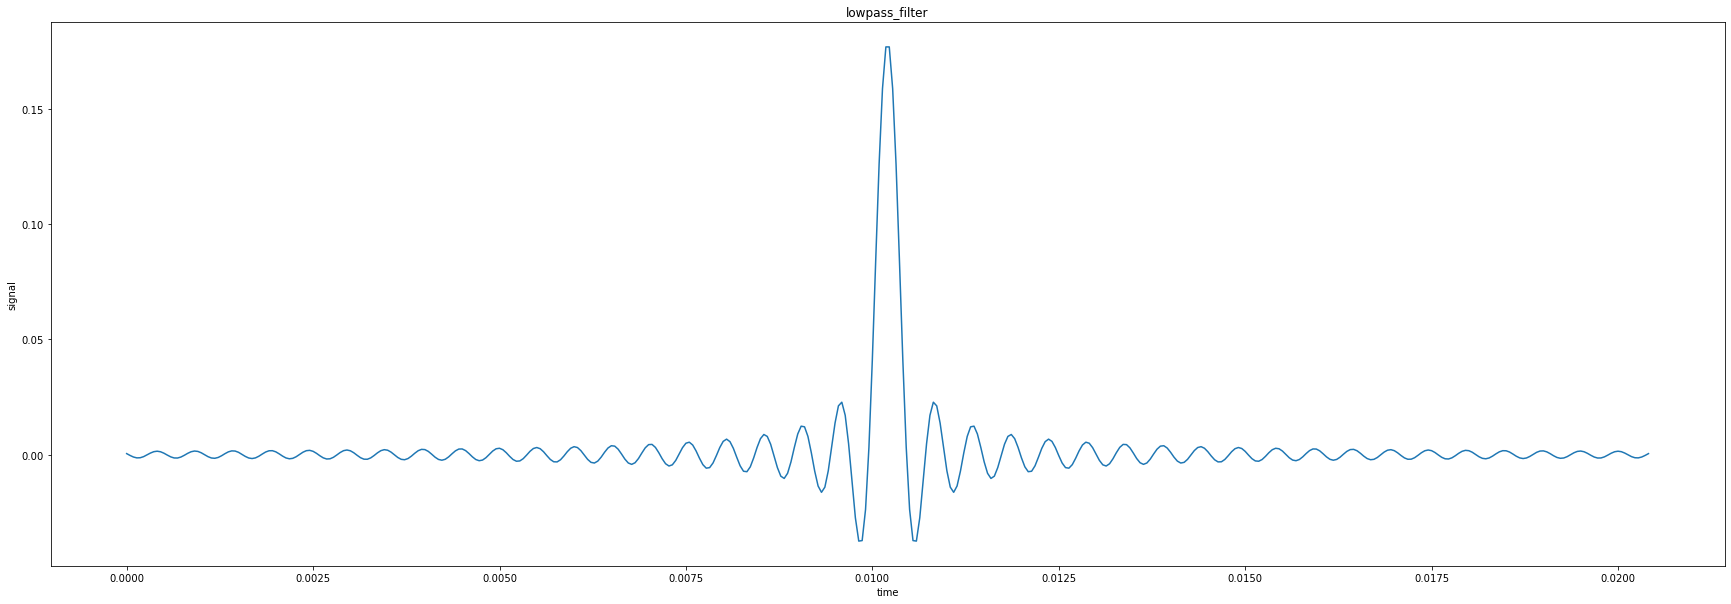

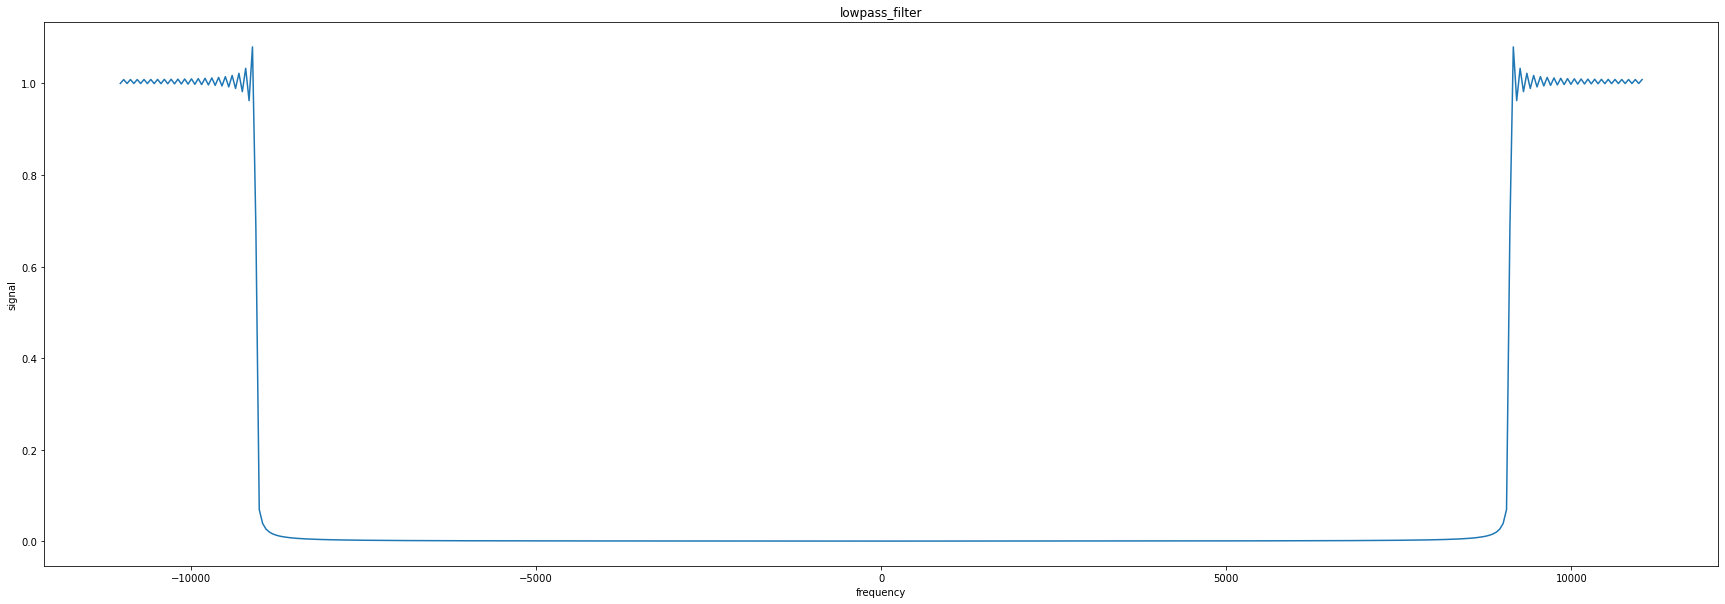

In [71]:
# lowpass filter
t = np.linspace(-500, 500, 450)
lowpass_filter = np.sin(20 * t) / t
lowpass_filter /= np.sum(lowpass_filter)
length_lowpass_filter = lowpass_filter.shape[0]/rate_noisy
t_lowpass_filter = np.linspace(0, length_lowpass_filter, lowpass_filter.shape[0])
plot('time', 'signal', 'lowpass_filter', t_lowpass_filter, lowpass_filter)
lowpass_filter_dft = np.fft.fft(lowpass_filter)
f_lowpass_filter = np.linspace(-rate_noisy/2, rate_noisy/2, lowpass_filter_dft.shape[0])
plot('frequency', 'signal', 'lowpass_filter', f_lowpass_filter, np.abs(lowpass_filter_dft))

Then we convolve the lowpass filter with noisy signal to pass high frequencies. We plot denoisy and Fourier transform of denoisy below.

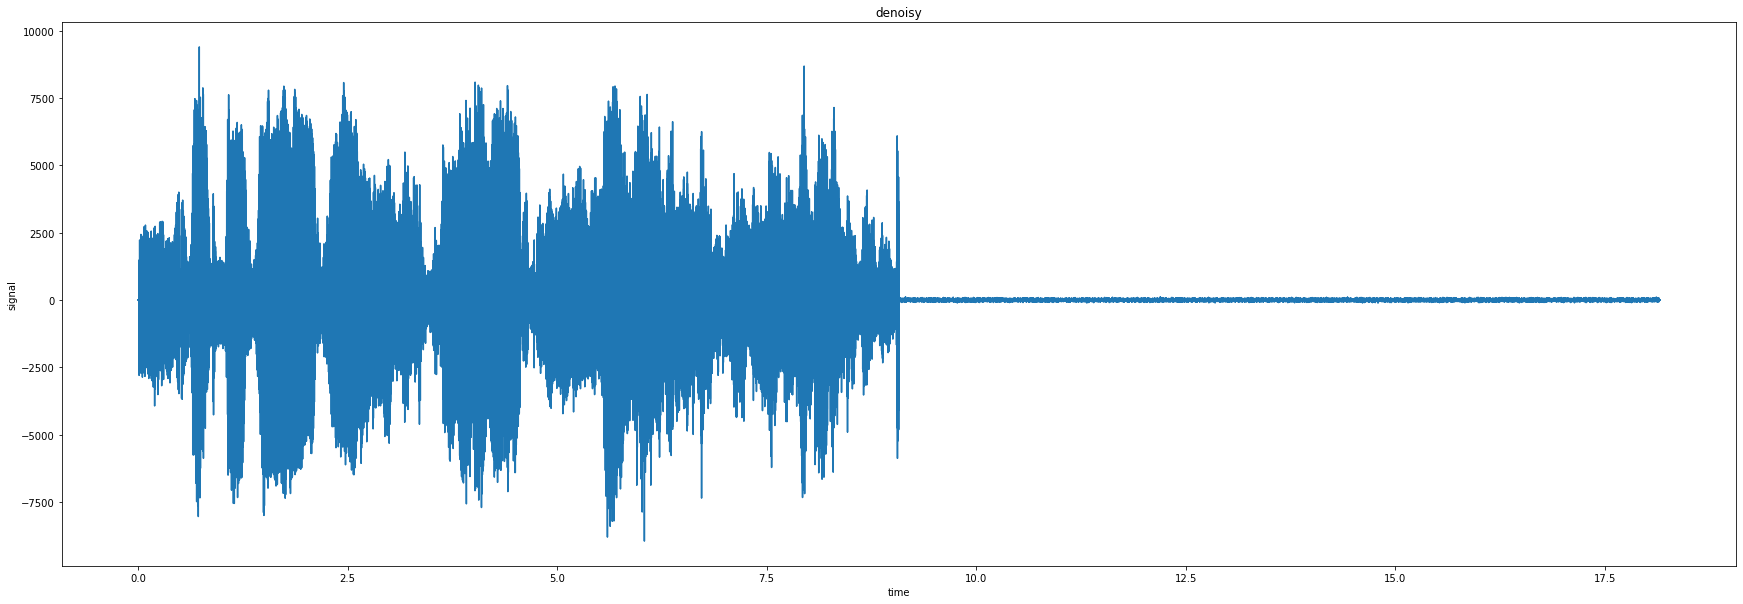

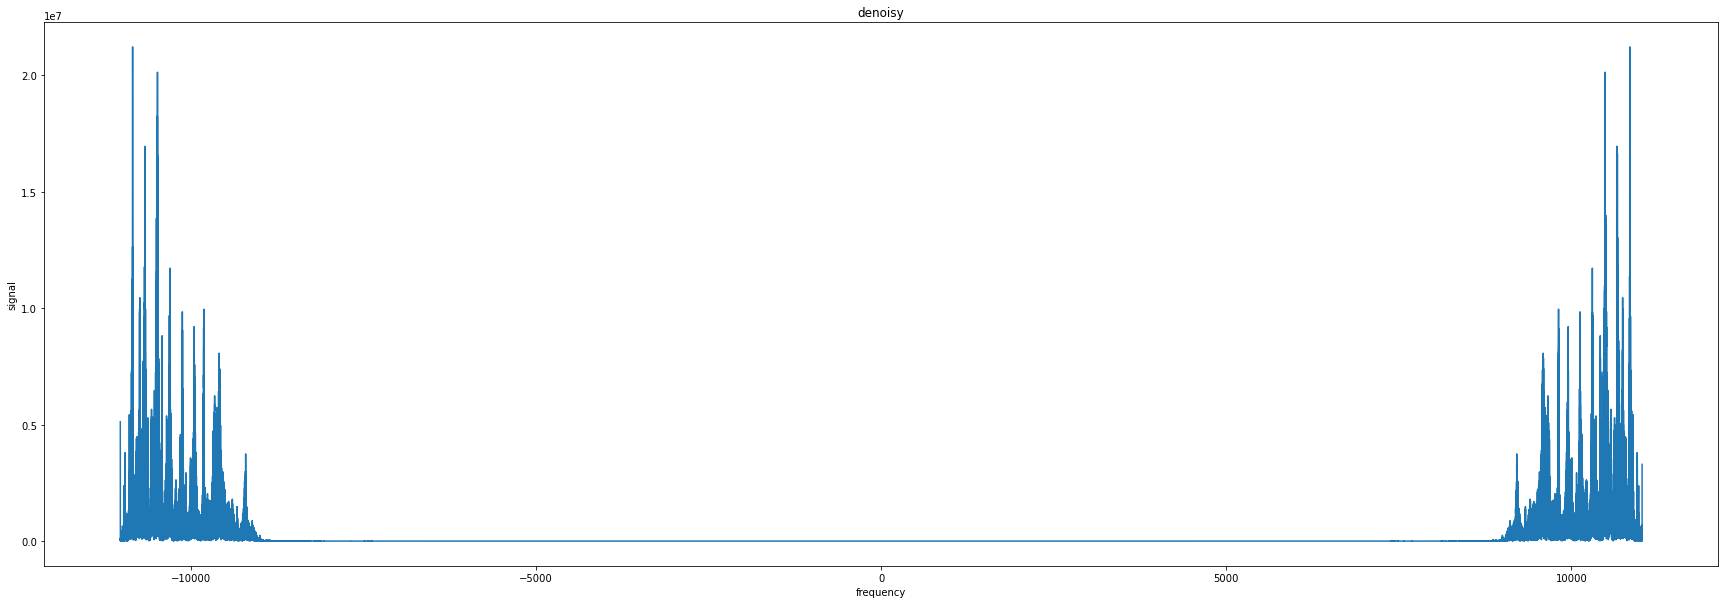

In [72]:
# signal denoisy
denoisy = np.convolve(lowpass_filter, noisy)
length_denoisy = denoisy.shape[0]/rate_noisy
t_denoisy = np.linspace(0, length_denoisy, denoisy.shape[0])
plot('time', 'signal', 'denoisy', t_denoisy, denoisy)
# fourier transform signal
denoisy_dft = np.fft.fft(denoisy)
f_denoisy = np.linspace(-rate_noisy/2, rate_noisy/2, denoisy_dft.shape[0])
plot('frequency', 'signal', 'denoisy', f_denoisy, np.abs(denoisy_dft))

In [73]:
wavfile.write("denoise1.wav", rate_noisy, denoisy.real)